In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:

# Load the Excel file into a DataFrame
excel_file_path = '/content/drive/MyDrive/LLM resutls /llm33011 .xlsx'  # Replace with the path to your Excel file
df = pd.read_excel(excel_file_path)

# Print DataFrame columns
print("DataFrame Columns:")
print(df.columns)

DataFrame Columns:
Index(['starter', 'receiver', 'relation_name', 'Claude-2 ',
       'Claude-1(propmt-2)', 'Claude-instant', 'Chat_GPT3.5', 'Cohere ',
       'Chat-GPT-4', 'Clauda-Pro', 'Palm2', 'Bard', 'Unnamed: 12',
       'Codellama-34instruct', 'wizardlm-70b', 'wizardlm-13b',
       'falcon-180b-chat', 'mistral-7b-instruct', 'chatglm2-6b', 'Vicuna-7b',
       'vicuna-33b', 'vicuna-13b', 'llama-2-70b-chat', 'llama-2-13b-chat',
       'llama-2-7b-chat', 'Qwen-14b-chat'],
      dtype='object')


In [ ]:
import pandas as pd

# Load the Excel file into a DataFrame
excel_file_path = '/content/drive/MyDrive/LLM resutls /llm33011 .xlsx'  # Replace with the path to your Excel file
df = pd.read_excel(excel_file_path)

# Prediction columns
model_columns = [
    'Claude-2 ', 'Claude-instant',
    'Chat_GPT3.5', 'Cohere ', 'Chat-GPT-4', 'Clauda-Pro',
    'Palm2', 'Bard', 'Codellama-34instruct',
    'wizardlm-70b', 'wizardlm-13b', 'falcon-180b-chat', 'mistral-7b-instruct',
    'chatglm2-6b', 'Vicuna-7b', 'vicuna-33b', 'vicuna-13b',
    'llama-2-70b-chat', 'llama-2-13b-chat', 'llama-2-7b-chat', 'Qwen-14b-chat'
]

# Preprocessing steps:
# 1. Convert all fields in the prediction columns to lower case
for column in model_columns:
    df[column] = df[column].str.lower()

# 2. Substitute "inhibitation" with "inhibition"
df[model_columns] = df[model_columns].replace('inhibitation', 'inhibition', regex=True)

# 3. Remove starting or ending blanks
df[model_columns] = df[model_columns].replace('^\s+|\s+$', '', regex=True)

# 4. Convert fields starting with "in" to "inhibition"
df[model_columns] = df[model_columns].replace('^in.*', 'inhibition', regex=True)

# 5. Convert fields starting with "phos" to "phosphorylation"
df[model_columns] = df[model_columns].replace('^phos.*', 'phosphorylation', regex=True)

# 6. Convert fields starting with "act" to "activation"
df[model_columns] = df[model_columns].replace('^act.*', 'activation', regex=True)

# 7. Convert fields that don't start with "inh", "phos", or "act" into "no information"
df[model_columns] = df[model_columns].replace('^(?!inhibition|phosphorylation|activation).*', 'no information', regex=True)

# Convert empty values (like NaN) to 'no information'
df[model_columns] = df[model_columns].fillna('no information')

# Output unique values in the prediction columns
unique_values = {column: df[column].unique() for column in model_columns}

# Print unique values for verification
for column, values in unique_values.items():
    print(f"Unique values in {column}: {values}")


Unique values in Claude-2 : ['inhibition' 'no information' 'activation' 'phosphorylation']
Unique values in Claude-instant: ['activation' 'no information' 'inhibition' 'phosphorylation']
Unique values in Chat_GPT3.5: ['inhibition' 'no information' 'activation' 'phosphorylation']
Unique values in Cohere : ['activation' 'no information' 'inhibition' 'phosphorylation']
Unique values in Chat-GPT-4: ['activation' 'inhibition' 'no information' 'phosphorylation']
Unique values in Clauda-Pro: ['inhibition' 'no information' 'activation' 'phosphorylation']
Unique values in Palm2: ['activation' 'inhibition' 'no information' 'phosphorylation']
Unique values in Bard: ['activation' 'no information' 'inhibition' 'phosphorylation']
Unique values in Codellama-34instruct: ['activation' 'no information' 'inhibition' 'phosphorylation']
Unique values in wizardlm-70b: ['activation' 'no information' 'inhibition']
Unique values in wizardlm-13b: ['activation' 'inhibition' 'no information' 'phosphorylation']
Un

In [ ]:
# List of all model columns
model_columns = [
    'Claude-2 ', 'Claude-instant',
    'Chat_GPT3.5', 'Cohere ', 'Chat-GPT-4', 'Clauda-Pro',
    'Palm2', 'Bard', 'Codellama-34instruct',
    'wizardlm-70b', 'wizardlm-13b', 'falcon-180b-chat', 'mistral-7b-instruct',
    'chatglm2-6b', 'Vicuna-7b', 'vicuna-33b', 'vicuna-13b',
    'llama-2-70b-chat', 'llama-2-13b-chat', 'llama-2-7b-chat', 'Qwen-14b-chat'
]



# Extract ground truth and predictions as strings, and calculate metrics for each column
for column in model_columns:
    if column in df.columns:
        ground_truth = df['relation_name'].astype(str)
        predicted_labels = df[column].astype(str)

        accuracy = accuracy_score(ground_truth, predicted_labels)
        precision = precision_score(ground_truth, predicted_labels, average='weighted')
        recall = recall_score(ground_truth, predicted_labels, average='weighted')
        f1 = f1_score(ground_truth, predicted_labels, average='weighted')

        # Print the metrics for each column
        print(f"Metrics for {column}:")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1 Score: {f1:.4f}")
        print("\n")
    else:
        print(f"Column '{column}' does not exist in the DataFrame.\n")


Metrics for Claude-2 :
Accuracy: 0.3582
Precision: 0.5185
Recall: 0.3582
F1 Score: 0.4215


Metrics for Claude-instant:
Accuracy: 0.2886
Precision: 0.4797
Recall: 0.2886
F1 Score: 0.3263


Metrics for Chat_GPT3.5:
Accuracy: 0.1095
Precision: 0.2804
Recall: 0.1095
F1 Score: 0.1485


Metrics for Cohere :
Accuracy: 0.3433
Precision: 0.4138
Recall: 0.3433
F1 Score: 0.3742


Metrics for Chat-GPT-4:
Accuracy: 0.3881
Precision: 0.5307
Recall: 0.3881
F1 Score: 0.4448


Metrics for Clauda-Pro:
Accuracy: 0.3781
Precision: 0.5305
Recall: 0.3781
F1 Score: 0.4386


Metrics for Palm2:
Accuracy: 0.2388
Precision: 0.3069
Recall: 0.2388
F1 Score: 0.2614


Metrics for Bard:
Accuracy: 0.2587
Precision: 0.3090
Recall: 0.2587
F1 Score: 0.2785


Metrics for Codellama-34instruct:
Accuracy: 0.1343
Precision: 0.3432
Recall: 0.1343
F1 Score: 0.1435


Metrics for wizardlm-70b:
Accuracy: 0.0398
Precision: 0.0527
Recall: 0.0398
F1 Score: 0.0449


Metrics for wizardlm-13b:
Accuracy: 0.0846
Precision: 0.2851
Recall:

In [ ]:
import pandas as pd

model_columns = [
    'Claude-2 ', 'Claude-instant',
    'Chat_GPT3.5', 'Cohere ', 'Chat-GPT-4', 'Clauda-Pro',
    'Palm2', 'Bard', 'Codellama-34instruct',
    'wizardlm-70b', 'wizardlm-13b', 'falcon-180b-chat', 'mistral-7b-instruct',
    'chatglm2-6b', 'Vicuna-7b', 'vicuna-33b', 'vicuna-13b',
    'llama-2-70b-chat', 'llama-2-13b-chat', 'llama-2-7b-chat', 'Qwen-14b-chat'
]

# Ground truth and prediction classes
ground_truth_classes = ['activation', 'inhibition', 'phosphorylation']
prediction_classes = ['activation', 'inhibition', 'phosphorylation', 'no information']

# Function to calculate metrics
def calculate_metrics(tp, tn, fp, fn):
    accuracy = (tp + tn) / (tp + tn + fp + fn) if (tp + tn + fp + fn) > 0 else 0
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    return accuracy, precision, recall, f1

# Loop through each model and calculate metrics for each class and overall
metrics_results = {}

for model in model_columns:
    if model in df.columns:
        model_metrics = {}
        overall_tp = overall_tn = overall_fp = overall_fn = 0

        for gt_class in ground_truth_classes:
            class_tp = class_tn = class_fp = class_fn = 0
            for i in range(len(df)):
                actual = df['relation_name'][i]
                predicted = df[model][i]

                if actual == gt_class:
                    if predicted == gt_class:
                        class_tp += 1
                        overall_tp += 1
                    else:
                        class_fn += 1
                        overall_fn += 1
                else:
                    if predicted == gt_class:
                        class_fp += 1
                        overall_fp += 1
                    else:
                        class_tn += 1
                        overall_tn += 1

            class_accuracy, class_precision, class_recall, class_f1 = calculate_metrics(class_tp, class_tn, class_fp, class_fn)
            model_metrics[gt_class] = {'Accuracy': class_accuracy, 'Precision': class_precision, 'Recall': class_recall, 'F1 Score': class_f1}

        # Overall metrics for the model
        overall_accuracy, overall_precision, overall_recall, overall_f1 = calculate_metrics(overall_tp, overall_tn, overall_fp, overall_fn)
        model_metrics['Overall'] = {'Accuracy': overall_accuracy, 'Precision': overall_precision, 'Recall': overall_recall, 'F1 Score': overall_f1}

        metrics_results[model] = model_metrics

# Print the results
for model, metrics in metrics_results.items():
    print(f"Metrics for {model}:")
    for class_name, class_metrics in metrics.items():
        print(f"  Class '{class_name}':")
        for metric_name, metric_value in class_metrics.items():
            print(f"    {metric_name}: {metric_value:.4f}")
    print("\n")


Metrics for Claude-2 :
  Class 'activation':
    Accuracy: 0.6020
    Precision: 0.5000
    Recall: 0.3750
    F1 Score: 0.4286
  Class 'inhibition':
    Accuracy: 0.5721
    Precision: 0.4318
    Recall: 0.2375
    F1 Score: 0.3065
  Class 'phosphorylation':
    Accuracy: 0.8756
    Precision: 0.7419
    Recall: 0.5750
    F1 Score: 0.6479
  Class 'Overall':
    Accuracy: 0.6833
    Precision: 0.5333
    Recall: 0.3600
    F1 Score: 0.4299


Metrics for Claude-instant:
  Class 'activation':
    Accuracy: 0.4726
    Precision: 0.3587
    Recall: 0.4125
    F1 Score: 0.3837
  Class 'inhibition':
    Accuracy: 0.5622
    Precision: 0.4091
    Recall: 0.2250
    F1 Score: 0.2903
  Class 'phosphorylation':
    Accuracy: 0.8308
    Precision: 0.8750
    Recall: 0.1750
    F1 Score: 0.2917
  Class 'Overall':
    Accuracy: 0.6219
    Precision: 0.4028
    Recall: 0.2900
    F1 Score: 0.3372


Metrics for Chat_GPT3.5:
  Class 'activation':
    Accuracy: 0.3433
    Precision: 0.0667
    Recall:

In [ ]:
import pandas as pd

rows_list = []

for model, metrics in metrics_results.items():
    row_data = {'Model': model}
    for class_name, class_metrics in metrics.items():
        for metric_name, metric_value in class_metrics.items():
            col_name = f"{class_name}_{metric_name}"
            row_data[col_name] = metric_value

    rows_list.append(row_data)

results_df = pd.DataFrame(rows_list)

results_df.to_csv('meta_results.csv', index=False)

print("Metrics written to 'meta_results.csv'")


Metrics written to 'meta_results.csv'


In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model_columns = [
    'Claude-2 ', 'Claude-instant',
    'Chat_GPT3.5', 'Cohere ', 'Chat-GPT-4', 'Clauda-Pro',
    'Palm2', 'Bard', 'Codellama-34instruct',
    'wizardlm-70b', 'wizardlm-13b', 'falcon-180b-chat', 'mistral-7b-instruct',
    'chatglm2-6b', 'Vicuna-7b', 'vicuna-33b', 'vicuna-13b',
    'llama-2-70b-chat', 'llama-2-13b-chat', 'llama-2-7b-chat', 'Qwen-14b-chat'
]


# Create an empty DataFrame to store the results
results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Extract ground truth and predictions as strings, and calculate metrics for each column
for column in model_columns:
    if column in df.columns:
        ground_truth = df['relation_name'].astype(str)
        predicted_labels = df[column].astype(str)


        accuracy = accuracy_score(ground_truth, predicted_labels)
        precision = precision_score(ground_truth, predicted_labels, average='weighted')
        recall = recall_score(ground_truth, predicted_labels, average='weighted')
        f1 = f1_score(ground_truth, predicted_labels, average='weighted')

         # Append the results to the results DataFrame
        results = results.append({
            'Model': column,
            'Accuracy': round(accuracy, 4),
            'Precision': round(precision, 4),
            'Recall': round(recall, 4),
            'F1 Score': round(f1, 4)
        }, ignore_index=True)
    else:
        print(f"Column '{column}' does not exist in the DataFrame.\n")

# Print the results in tabular form
print(results)

                   Model  Accuracy  Precision  Recall  F1 Score
0              Claude-2     0.3582     0.5185  0.3582    0.4215
1         Claude-instant    0.2886     0.4797  0.2886    0.3263
2            Chat_GPT3.5    0.1095     0.2804  0.1095    0.1485
3                Cohere     0.3433     0.4138  0.3433    0.3742
4             Chat-GPT-4    0.3881     0.5307  0.3881    0.4448
5             Clauda-Pro    0.3781     0.5305  0.3781    0.4386
6                  Palm2    0.2388     0.3069  0.2388    0.2614
7                   Bard    0.2587     0.3090  0.2587    0.2785
8   Codellama-34instruct    0.1343     0.3432  0.1343    0.1435
9           wizardlm-70b    0.0398     0.0527  0.0398    0.0449
10          wizardlm-13b    0.0846     0.2851  0.0846    0.0962
11      falcon-180b-chat    0.2736     0.3340  0.2736    0.2787
12   mistral-7b-instruct    0.1045     0.1886  0.1045    0.1226
13           chatglm2-6b    0.1891     0.1762  0.1891    0.1821
14             Vicuna-7b    0.0896     0

<ipython-input-64-db5032fb521a>:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='F1 Score', y="Model", hue="Type", data=df, palette="viridis", ci=None)
<ipython-input-64-db5032fb521a>:48: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=metric, y="Model", hue="Type", data=df, palette="viridis", ci=None)
<ipython-input-64-db5032fb521a>:48: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=metric, y="Model", hue="Type", data=df, palette="viridis", ci=None)


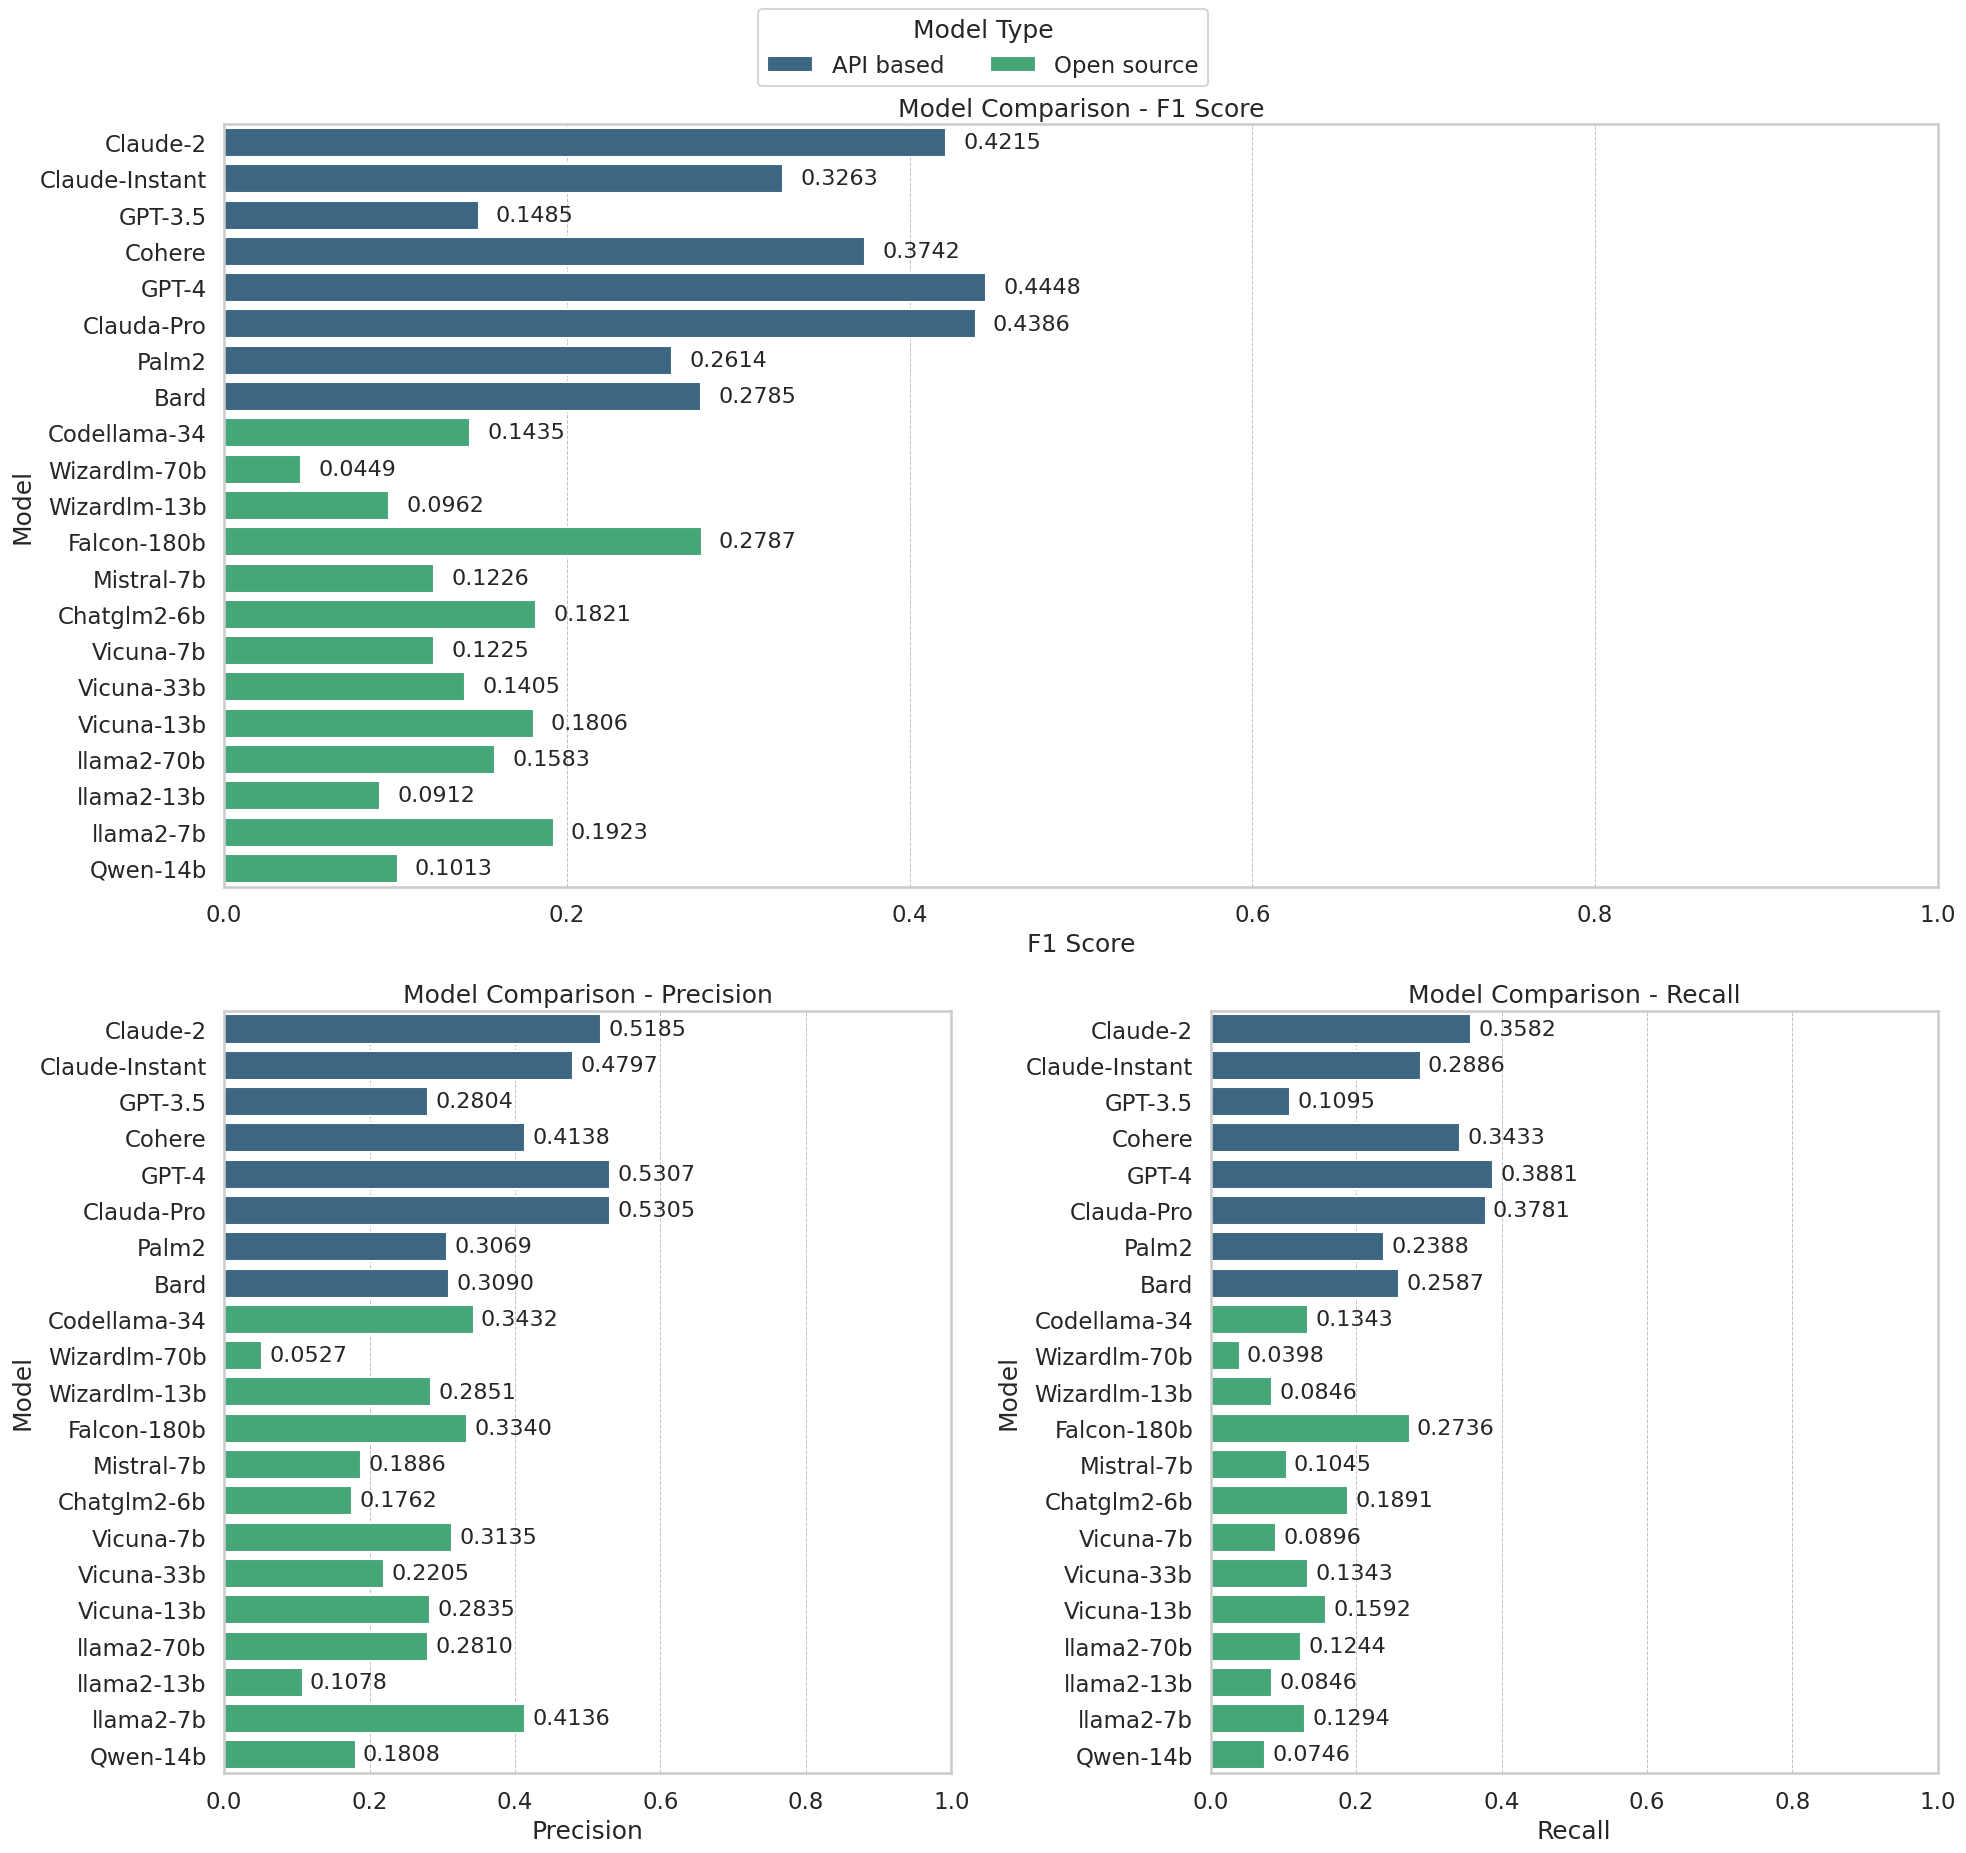

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the data as a DataFrame
data = {
    'Type': ['API based', 'API based', 'API based', 'API based', 'API based', 'API based', 'API based', 'API based',
             'Open source', 'Open source', 'Open source', 'Open source', 'Open source', 'Open source', 'Open source', 'Open source', 'Open source', 'Open source', 'Open source', 'Open source', 'Open source'],
    'Model': ['Claude-2', 'Claude-Instant', 'GPT-3.5', 'Cohere', 'GPT-4', 'Clauda-Pro', 'Palm2', 'Bard',
              'Codellama-34', 'Wizardlm-70b', 'Wizardlm-13b', 'Falcon-180b', 'Mistral-7b', 'Chatglm2-6b', 'Vicuna-7b', 'Vicuna-33b', 'Vicuna-13b', 'llama2-70b', 'llama2-13b', 'llama2-7b', 'Qwen-14b'],
    'F1 Score': [0.4215, 0.3263, 0.1485, 0.3742, 0.4448, 0.4386, 0.2614, 0.2785, 0.1435, 0.0449, 0.0962, 0.2787, 0.1226, 0.1821, 0.1225, 0.1405, 0.1806, 0.1583, 0.0912, 0.1923, 0.1013],
    'Precision': [0.5185, 0.4797, 0.2804, 0.4138, 0.5307, 0.5305, 0.3069, 0.3090, 0.3432, 0.0527, 0.2851, 0.3340, 0.1886, 0.1762, 0.3135, 0.2205, 0.2835, 0.2810, 0.1078, 0.4136, 0.1808],
    'Recall': [0.3582, 0.2886, 0.1095, 0.3433, 0.3881, 0.3781, 0.2388, 0.2587, 0.1343, 0.0398, 0.0846, 0.2736, 0.1045, 0.1891, 0.0896, 0.1343, 0.1592, 0.1244, 0.0846, 0.1294, 0.0746],
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Set the style and context to make the plots prettier
sns.set_style("whitegrid")
sns.set_context("talk")

# Increase the figure size
plt.figure(figsize=(20,18))

# Define the specific x-axis ticks and labels you want to display
xticks = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]

# Creating subplots for each metric
# F1 Score on the top
plt.subplot(2, 1, 1)
#sns.barplot(x='F1 Score', y="Model", hue="Type", data=df, palette="viridis", ci=None)
sns.barplot(x='F1 Score', y="Model", hue="Type", data=df, palette="viridis", ci=None)
plt.xlim(0, 1)
plt.xticks(xticks)
plt.title('Model Comparison - F1 Score')
plt.grid(axis='x', color='silver', linestyle='--', linewidth=0.7)
plt.legend().set_visible(False)

# Annotate the bars with numeric values for F1 Score
for index, row in df.iterrows():
    value = row['F1 Score']
    plt.text(value + 0.01, index, f'{value:.4f}', va='center', fontsize=16)

# Precision and Recall at the bottom
for i, metric in enumerate(['Precision', 'Recall'], 1):
    plt.subplot(2, 2, i + 2)
    sns.barplot(x=metric, y="Model", hue="Type", data=df, palette="viridis", ci=None)
    plt.xlim(0, 1)
    plt.xticks(xticks)
    plt.title(f'Model Comparison - {metric}')
    plt.grid(axis='x', color='silver', linestyle='--', linewidth=0.7)
    plt.legend().set_visible(False)

    # Annotate the bars with numeric values for Precision and Recall
    for index, row in df.iterrows():
        value = row[metric]
        plt.text(value + 0.01, index, f'{value:.4f}', va='center', fontsize=16)

# Add a single legend to the top middle of the entire figure
handles, labels = plt.gca().get_legend_handles_labels()
plt.figlegend(handles, labels, title="Model Type", loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1.04))

# Adjust the space between subplots
plt.tight_layout()

# Display the plots
plt.show()


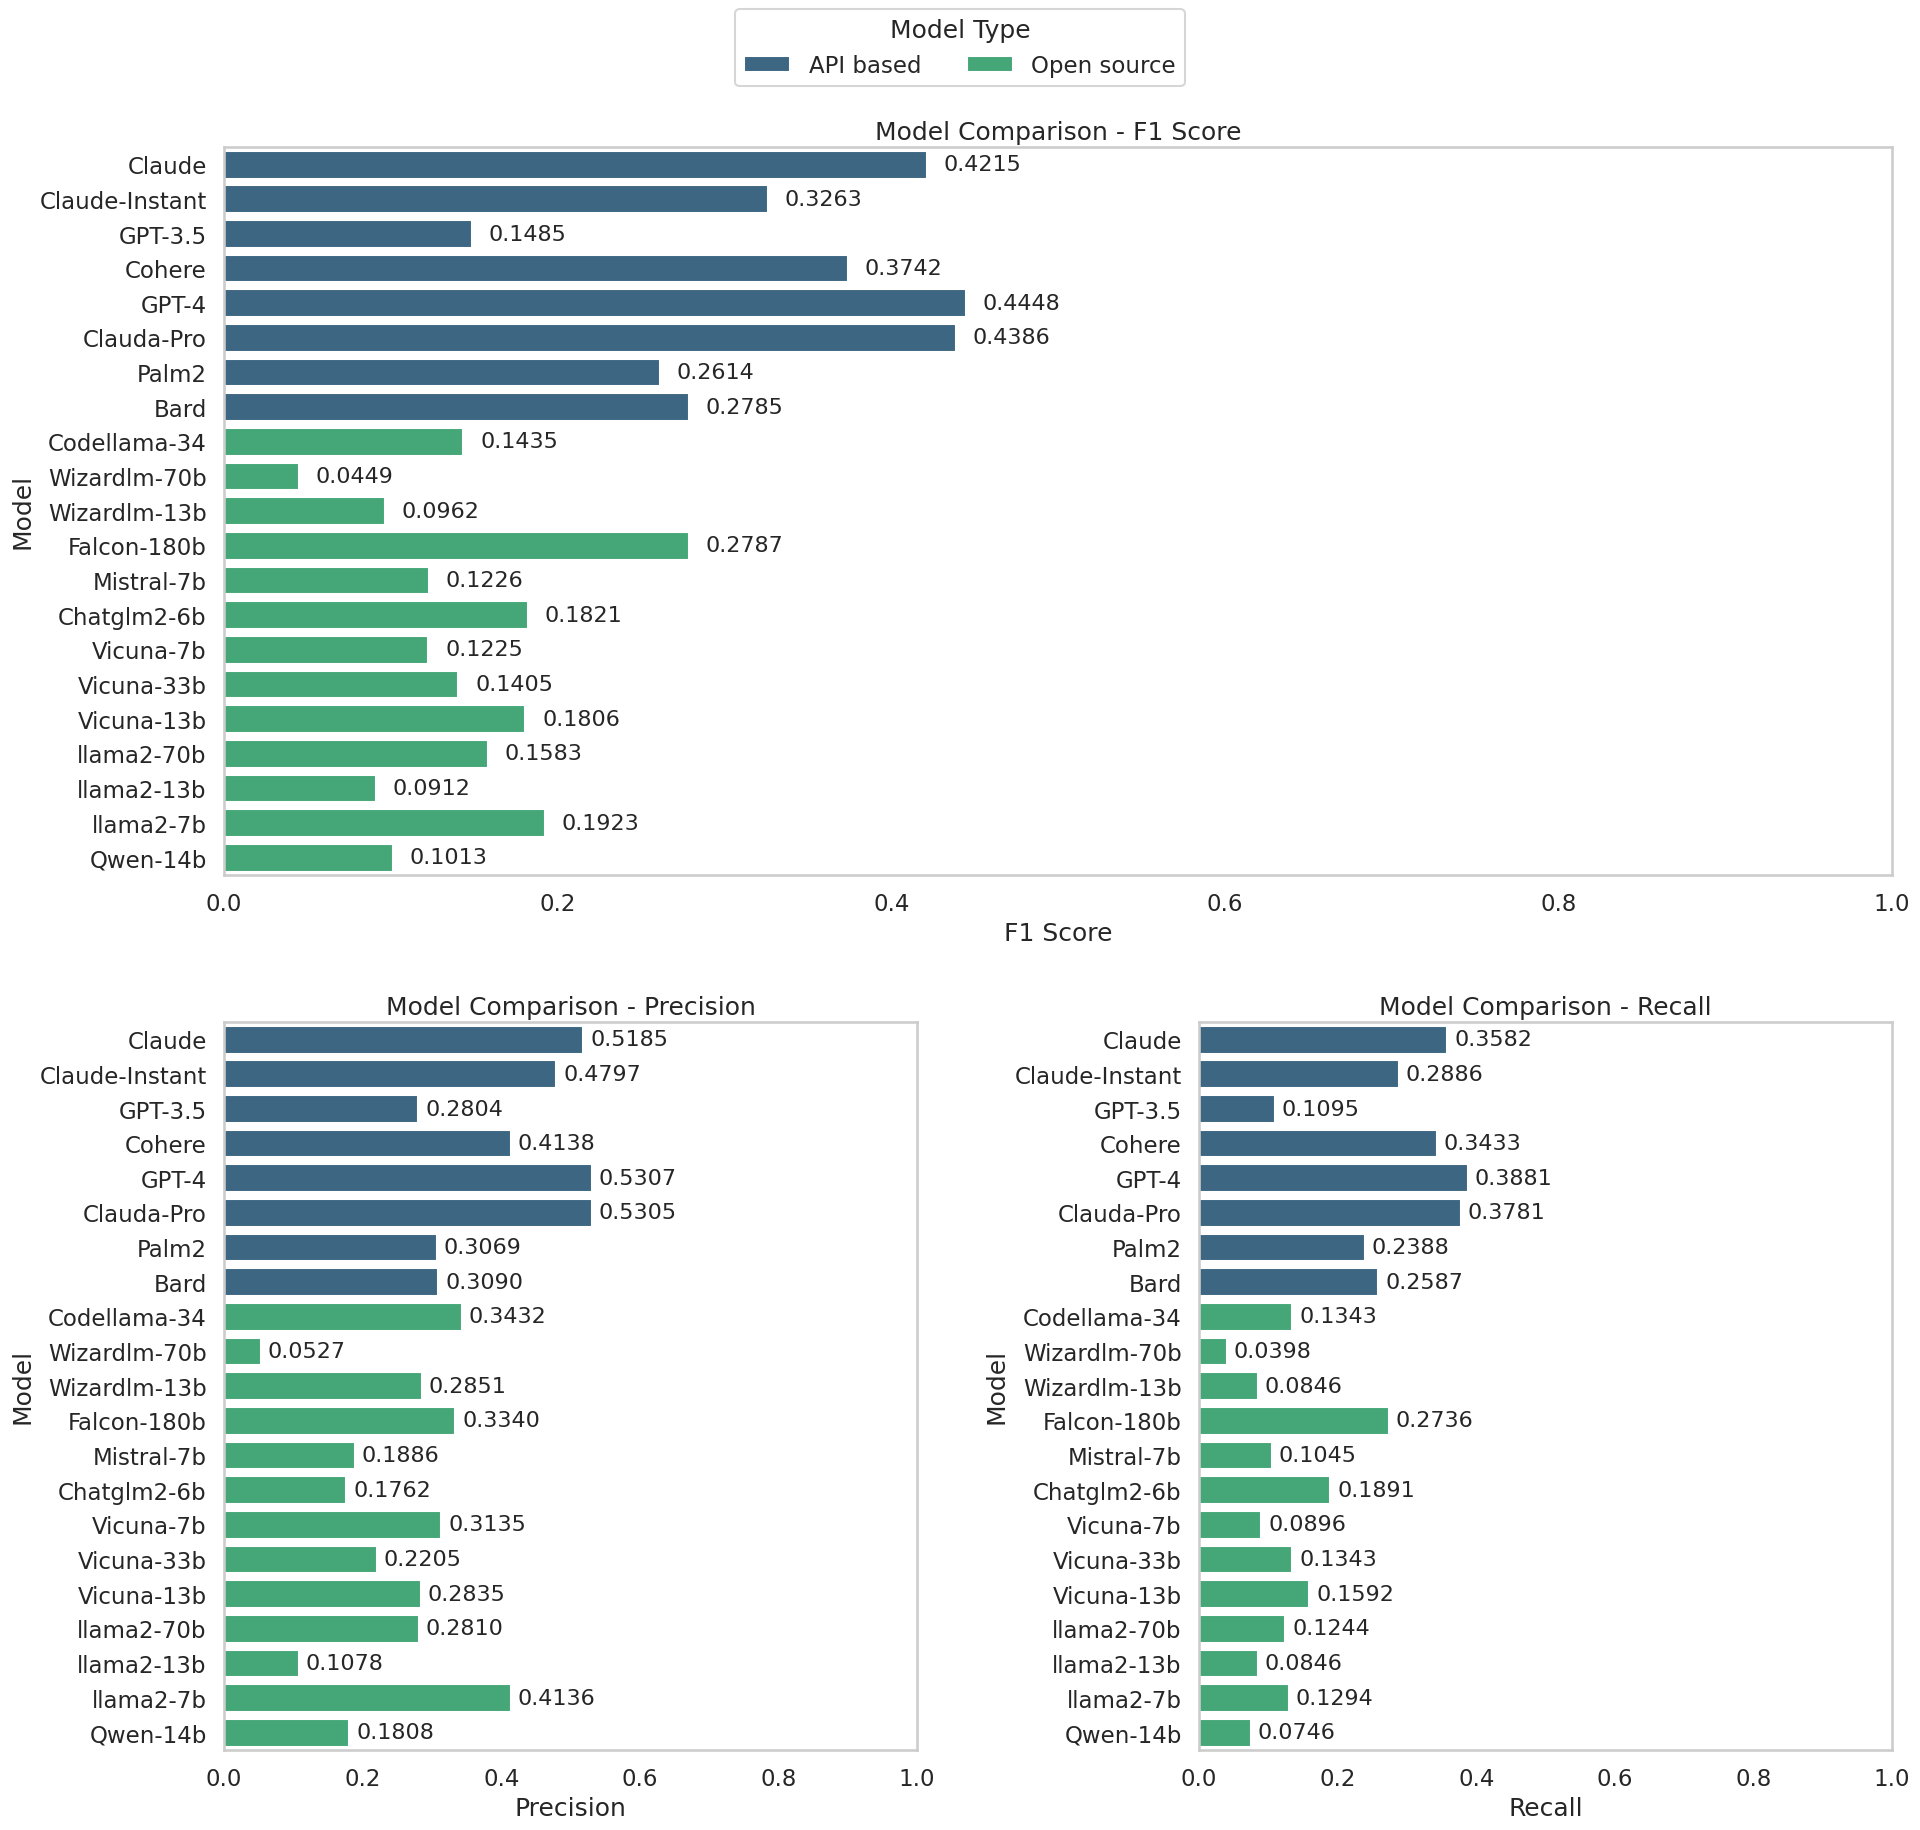

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the data as a DataFrame
data = {
    'Type': ['API based', 'API based', 'API based', 'API based', 'API based', 'API based', 'API based', 'API based',
             'Open source', 'Open source', 'Open source', 'Open source', 'Open source', 'Open source', 'Open source', 'Open source', 'Open source', 'Open source', 'Open source', 'Open source', 'Open source'],
    'Model': ['Claude', 'Claude-Instant', 'GPT-3.5', 'Cohere', 'GPT-4', 'Clauda-Pro', 'Palm2', 'Bard',
              'Codellama-34', 'Wizardlm-70b', 'Wizardlm-13b', 'Falcon-180b', 'Mistral-7b', 'Chatglm2-6b', 'Vicuna-7b', 'Vicuna-33b', 'Vicuna-13b', 'llama2-70b', 'llama2-13b', 'llama2-7b', 'Qwen-14b'],
    'F1 Score': [0.4215, 0.3263, 0.1485, 0.3742, 0.4448, 0.4386, 0.2614, 0.2785, 0.1435, 0.0449, 0.0962, 0.2787, 0.1226, 0.1821, 0.1225, 0.1405, 0.1806, 0.1583, 0.0912, 0.1923, 0.1013],
    'Precision': [0.5185, 0.4797, 0.2804, 0.4138, 0.5307, 0.5305, 0.3069, 0.3090, 0.3432, 0.0527, 0.2851, 0.3340, 0.1886, 0.1762, 0.3135, 0.2205, 0.2835, 0.2810, 0.1078, 0.4136, 0.1808],
    'Recall': [0.3582, 0.2886, 0.1095, 0.3433, 0.3881, 0.3781, 0.2388, 0.2587, 0.1343, 0.0398, 0.0846, 0.2736, 0.1045, 0.1891, 0.0896, 0.1343, 0.1592, 0.1244, 0.0846, 0.1294, 0.0746],
}

# Assuming 'data' is already defined and contains the relevant information
df = pd.DataFrame(data)

# Set the style and context to make the plots prettier
sns.set_style("whitegrid")
sns.set_context("talk")

# Increase the figure size
plt.figure(figsize=(20, 18))

# Define the specific x-axis ticks and labels you want to display
xticks = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]

# Creating subplots for each metric
# F1 Score on the top
plt.subplot(2, 1, 1)
sns.barplot(x='F1 Score', y="Model", hue="Type", data=df, palette="viridis", errorbar=None)
plt.xlim(0, 1)
plt.xticks(xticks)
plt.title('Model Comparison - F1 Score')
plt.grid(axis='x', color='silver', linestyle='--', linewidth=0.1, alpha=0.0)  # Reduced alpha for more transparent grid
plt.legend().set_visible(False)

# Annotate the bars with numeric values for F1 Score
for index, row in df.iterrows():
    value = row['F1 Score']
    plt.text(value + 0.01, index, f'{value:.4f}', va='center', fontsize=16)

# Precision and Recall at the bottom
for i, metric in enumerate(['Precision', 'Recall'], 1):
    plt.subplot(2, 2, i + 2)
    sns.barplot(x=metric, y="Model", hue="Type", data=df, palette="viridis", errorbar=None)
    plt.xlim(0, 1)
    plt.xticks(xticks)
    plt.title(f'Model Comparison - {metric}')
    plt.grid(axis='x', color='silver', linestyle='--', linewidth=0.1, alpha=0.0)  # Reduced alpha for more transparent grid
    plt.legend().set_visible(False)

    # Annotate the bars with numeric values for Precision and Recall
    for index, row in df.iterrows():
        value = row[metric]
        plt.text(value + 0.01, index, f'{value:.4f}', va='center', fontsize=16)

# Add a single legend to the top middle of the entire figure
handles, labels = plt.gca().get_legend_handles_labels()
plt.figlegend(handles, labels, title="Model Type", loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1.04))

# Adjust the space between subplots
plt.tight_layout(pad=2.0)

# Display the plots
plt.show()




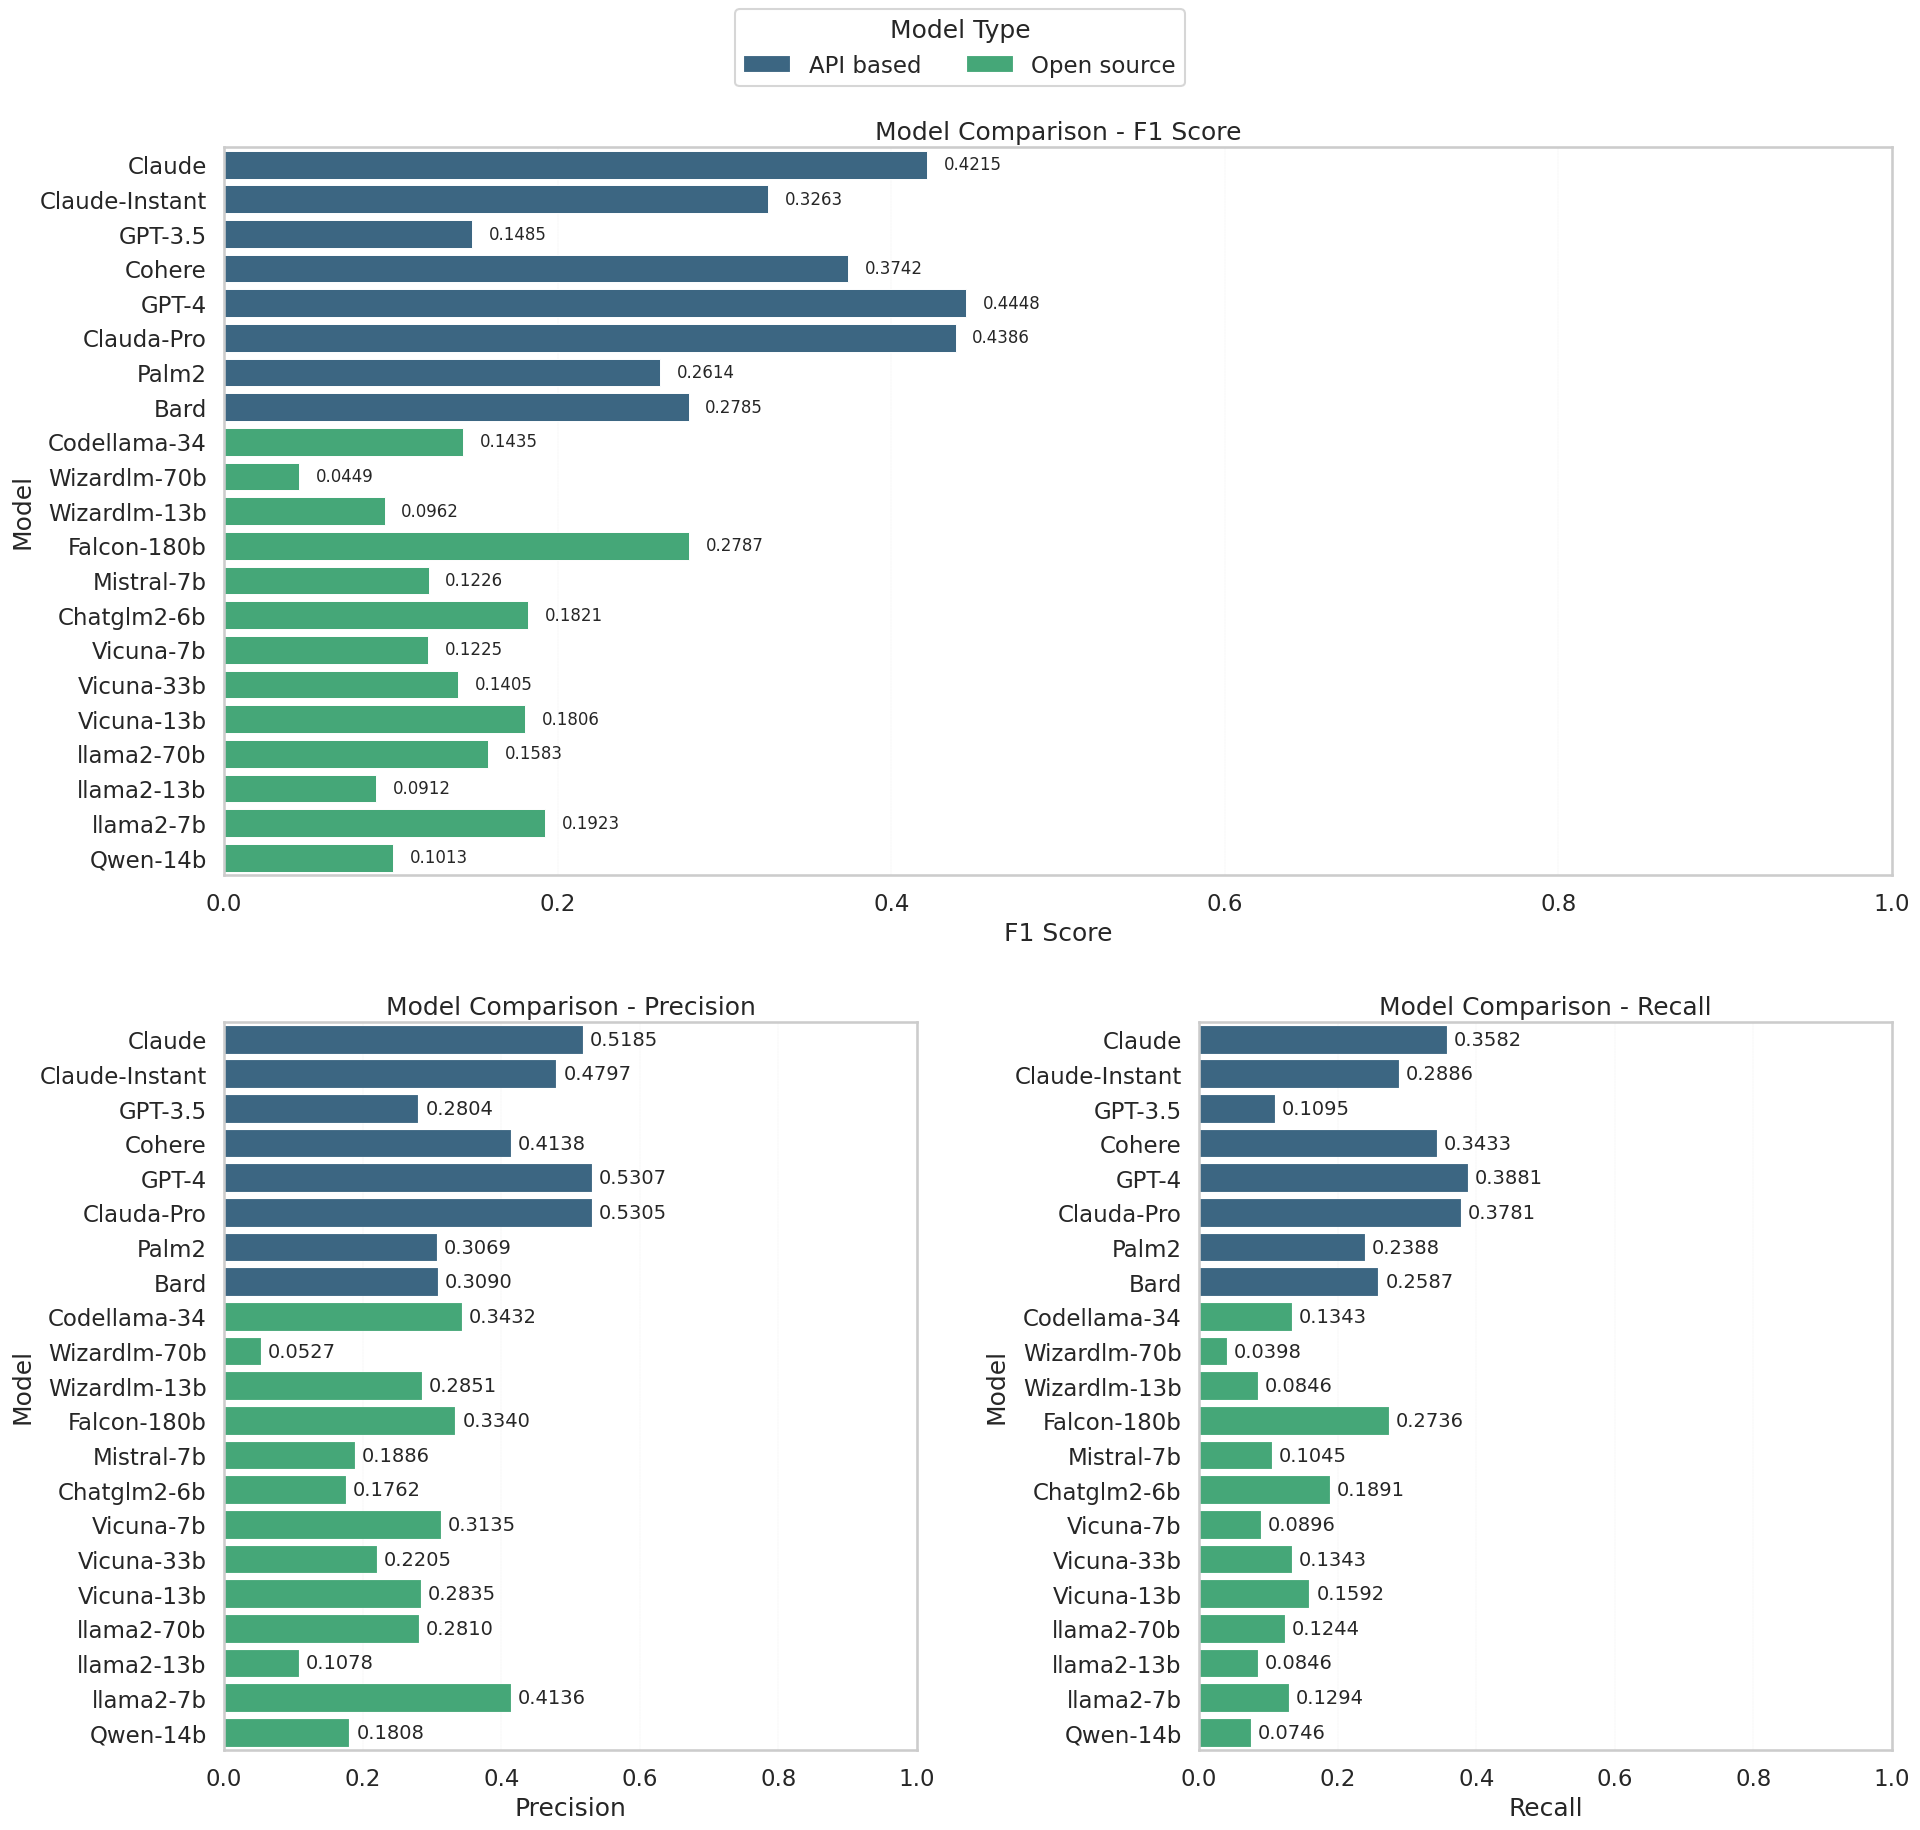

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Define the data as a DataFrame
data = {
    'Type': ['API based', 'API based', 'API based', 'API based', 'API based', 'API based', 'API based', 'API based',
             'Open source', 'Open source', 'Open source', 'Open source', 'Open source', 'Open source', 'Open source', 'Open source', 'Open source', 'Open source', 'Open source', 'Open source', 'Open source'],
    'Model': ['Claude', 'Claude-Instant', 'GPT-3.5', 'Cohere', 'GPT-4', 'Clauda-Pro', 'Palm2', 'Bard',
              'Codellama-34', 'Wizardlm-70b', 'Wizardlm-13b', 'Falcon-180b', 'Mistral-7b', 'Chatglm2-6b', 'Vicuna-7b', 'Vicuna-33b', 'Vicuna-13b', 'llama2-70b', 'llama2-13b', 'llama2-7b', 'Qwen-14b'],
    'F1 Score': [0.4215, 0.3263, 0.1485, 0.3742, 0.4448, 0.4386, 0.2614, 0.2785, 0.1435, 0.0449, 0.0962, 0.2787, 0.1226, 0.1821, 0.1225, 0.1405, 0.1806, 0.1583, 0.0912, 0.1923, 0.1013],
    'Precision': [0.5185, 0.4797, 0.2804, 0.4138, 0.5307, 0.5305, 0.3069, 0.3090, 0.3432, 0.0527, 0.2851, 0.3340, 0.1886, 0.1762, 0.3135, 0.2205, 0.2835, 0.2810, 0.1078, 0.4136, 0.1808],
    'Recall': [0.3582, 0.2886, 0.1095, 0.3433, 0.3881, 0.3781, 0.2388, 0.2587, 0.1343, 0.0398, 0.0846, 0.2736, 0.1045, 0.1891, 0.0896, 0.1343, 0.1592, 0.1244, 0.0846, 0.1294, 0.0746],
}

# Assuming 'data' is already defined and contains the relevant information
df = pd.DataFrame(data)

# Set the style and context to make the plots prettier
sns.set_style("whitegrid")
sns.set_context("talk")

# Increase the figure size
plt.figure(figsize=(20, 18))

# Define the specific x-axis ticks and labels you want to display
xticks = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]

# Creating subplots for each metric
# F1 Score on the top
plt.subplot(2, 1, 1)
sns.barplot(x='F1 Score', y="Model", hue="Type", data=df, palette="viridis", errorbar=None, linewidth=0.7)
plt.xlim(0, 1)
plt.xticks(xticks)
plt.title('Model Comparison - F1 Score')
plt.grid(axis='x', color='silver', linestyle='--', linewidth=0.1)
plt.legend().set_visible(False)

# Annotate the bars with numeric values for F1 Score
for index, row in df.iterrows():
    value = row['F1 Score']
    plt.text(value + 0.01, index, f'{value:.4f}', va='center', fontsize=12)

# Precision and Recall at the bottom
for i, metric in enumerate(['Precision', 'Recall'], 1):
    plt.subplot(2, 2, i + 2)
    sns.barplot(x=metric, y="Model", hue="Type", data=df, palette="viridis", errorbar=None, linewidth=0.1)
    plt.xlim(0, 1)
    plt.xticks(xticks)
    plt.title(f'Model Comparison - {metric}')
    plt.grid(axis='x', color='silver', linestyle='--', linewidth=0.1)
    plt.legend().set_visible(False)

    # Annotate the bars with numeric values for Precision and Recall
    for index, row in df.iterrows():
        value = row[metric]
        plt.text(value + 0.01, index, f'{value:.4f}', va='center', fontsize=14)

# Add a single legend to the top middle of the entire figure
handles, labels = plt.gca().get_legend_handles_labels()
plt.figlegend(handles, labels, title="Model Type", loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1.04))

# Adjust the space between subplots
plt.tight_layout(pad=2.0)

# Display the plots
plt.show()


In [ ]:
import pandas as pd

data = {
    'Type': ['API base', 'API base', 'API base', 'API base', 'API base', 'API base', 'API base', 'API base',
             'Open source', 'Open source', 'Open source', 'Open source', 'Open source', 'Open source', 'Open source',
             'Open source', 'Open source', 'Open source', 'Open source', 'Open source', 'Open source'],
    'Model': ['Claude-2', 'Claude-instant', 'Chat_GPT3.5', 'Cohere', 'Chat-GPT-4', 'Clauda-Pro', 'Palm2', 'Bard',
              'Codellama-34instruct', 'wizardlm-70b', 'wizardlm-13b', 'falcon-180b-chat', 'mistral-7b-instruct',
              'chatglm2-6b', 'Vicuna-7b', 'vicuna-33b', 'vicuna-13b', 'llama-2-70b-chat', 'llama-2-13b-chat',
              'llama-2-7b-chat', 'Qwen-14b-chat'],
    'Gene Regulatory Relations': [0.4215, 0.3263, 0.1485, 0.3742, 0.4448, 0.4386, 0.2614, 0.2785, 0.1435, 0.0449, 0.0962, 0.2787, 0.1226, 0.1821, 0.1225,
                 0.1405, 0.1806, 0.1583, 0.0912, 0.1923, 0.1013]


}

df = pd.DataFrame(data)

# Sorting the models based on their performance
api_based = df[df['Type'] == 'API base'].sort_values(by='Gene Regulatory Relations', ascending=False).reset_index()
open_source = df[df['Type'] == 'Open source'].sort_values(by='Gene Regulatory Relations', ascending=False).reset_index()

# Printing the ranked models
print("API-based Models Ranked High to Low:")
for i in range(len(api_based)):
    print(f"{i+1}. {api_based.loc[i, 'Model']} - {api_based.loc[i, 'Gene Regulatory Relations']:.4f}")

print("\nOpen-source Models Ranked High to Low:")
for i in range(len(open_source)):
    print(f"{i+1}. {open_source.loc[i, 'Model']} - {open_source.loc[i, 'Gene Regulatory Relations']:.4f}")


API-based Models Ranked High to Low:
1. Chat-GPT-4 - 0.4448
2. Clauda-Pro - 0.4386
3. Claude-2 - 0.4215
4. Cohere - 0.3742
5. Claude-instant - 0.3263
6. Bard - 0.2785
7. Palm2 - 0.2614
8. Chat_GPT3.5 - 0.1485

Open-source Models Ranked High to Low:
1. falcon-180b-chat - 0.2787
2. llama-2-7b-chat - 0.1923
3. chatglm2-6b - 0.1821
4. vicuna-13b - 0.1806
5. llama-2-70b-chat - 0.1583
6. Codellama-34instruct - 0.1435
7. vicuna-33b - 0.1405
8. mistral-7b-instruct - 0.1226
9. Vicuna-7b - 0.1225
10. Qwen-14b-chat - 0.1013
11. wizardlm-13b - 0.0962
12. llama-2-13b-chat - 0.0912
13. wizardlm-70b - 0.0449
